In [4]:
Aubreigh DeFriece, Section C

SyntaxError: invalid syntax (662327128.py, line 1)

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [4]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

pp_df = pd.read_csv('https://raw.githubusercontent.com/GettysburgDataScience/ps05-adefriece/refs/heads/main/titanic.csv')
pp_df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## 
Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [78]:
'''your code here'''
df = pd.read_csv('titanic.csv')

total_passengers = df.shape[0]
male_percentage = (df[df['Sex'] == 1].shape[0] / total_passengers) * 100
survived_percentage = (df[df['Survived'] == 1].shape[0] / total_passengers) * 100

print (total_passengers)
print (male_percentage)
print (survived_percentage)

891
64.75869809203144
38.38383838383838


Your written answer:

 - <Answer 1> 891
 - <Answer 2> 64.76%
 - <Answer 3> 38.38

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [8]:
'''your code here'''
df = pd.read_csv('titanic.csv')

female_survived_percentage = (df[(df['Sex'] == 0) & (df['Survived'] == 1)].shape[0] / df[df['Survived'] == 1].shape[0]) * 100
male_survived_percentage = (df[(df['Sex'] == 1) & (df['Survived'] == 1)].shape[0] / df[df['Survived'] == 1].shape[0]) * 100
print (female_survived_percentage)
print (male_survived_percentage)

68.12865497076024
31.871345029239766


Your written answer:

 - <Answer 1> 68.13%
 - <Answer 2> 31.87%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [11]:
'''your code here'''
#this groups the classes and calc the percentages
ticket_class = df['Pclass'].value_counts(normalize=True) * 100
survivorship_class = df.groupby('Pclass')['Survived'].mean() * 100
#combines results
results = pd.DataFrame({
    '% tickets': ticket_class,
    '% survivorship': survivorship_class
}).sort_index()

print(results)

        % tickets  % survivorship
Pclass                           
1       24.242424       62.962963
2       20.650954       47.282609
3       55.106622       24.236253


Your written answer:

 - Class 1 
    - % tickets: 24.24%
    - % survivorship: 62.96%
- Class 2 
    - % tickets: 20.65%
    - % survivorship: 47.28%
- Class 3
    - % tickets: 55.11%
    - % survivorship: 24.24%


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

In [14]:
'''Your code here'''
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

# first 5 rows
print("Survivors:\n", survivors.head())
print("\nNon-Survivors:\n", non_survivors.head())

Survivors:
     Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
     Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


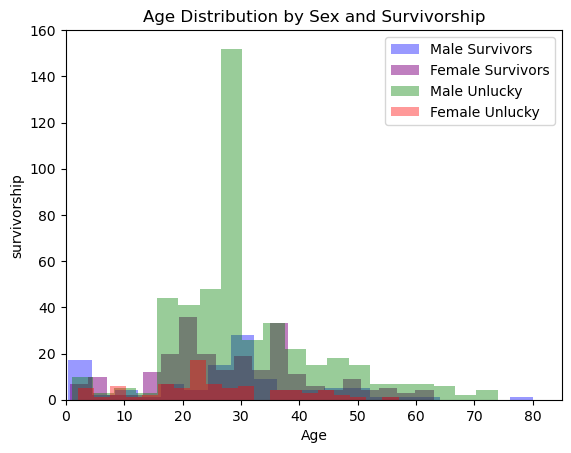

In [117]:
# age, sex, and survivorship
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("titanic.csv")

plt.hist(survivors[survivors['Sex'] == 1]['Age'].dropna(), bins=20, color='blue', alpha=0.4, label='Male Survivors')

plt.hist(survivors[survivors['Sex'] == 0]['Age'].dropna(), bins=20, color='purple', alpha=0.5, label='Female Survivors')

plt.hist(non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(), bins=20, color='green', alpha=0.4, label='Male Unlucky')

plt.hist(non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(), bins=20, color='red', alpha=0.4, label='Female Unlucky')

plt.xlim(0, 85)
plt.ylim(0, 160)

plt.xlabel('Age')
plt.ylabel('survivorship')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.show()

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [123]:
'''Your code here'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

features = ['Age', 'Sex']
label = ['Survived']

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#decision tree
X_train, X_test, y_train, y_test = train_test_split(titanic_df[features], titanic_df[label], test_size = 0.2)

In [127]:
ss = StandardScaler()
ss.fit(X_train)
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

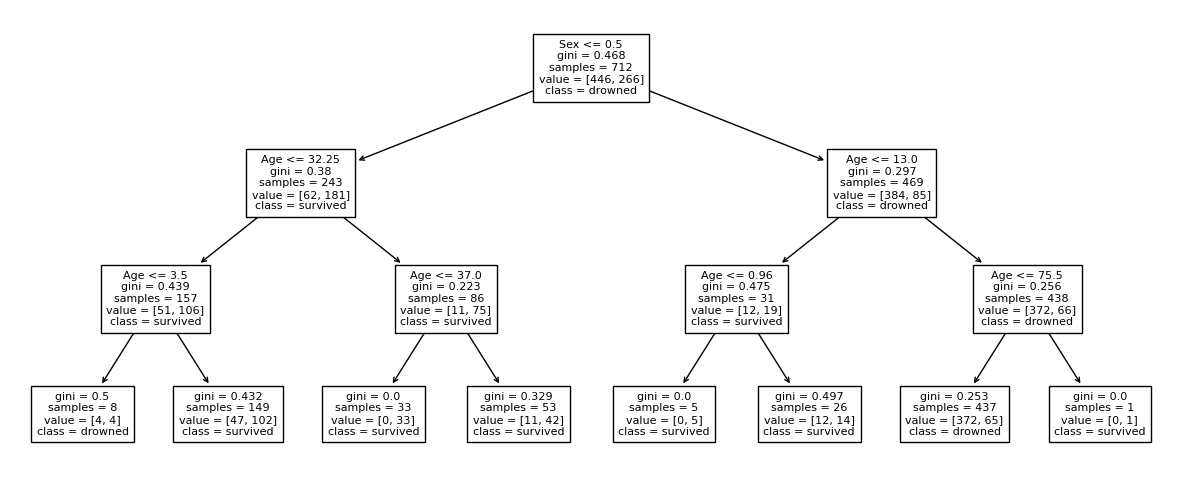

In [151]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(15,6))
plot_tree(tree_clf,
          class_names = ['drowned', 'survived'],
          feature_names = ['Age', 'Sex'],
          fontsize = 8)
plt.show()
                                

In [131]:
from sklearn.metrics import ConfusionMatrixDisplay

y_tree_train = tree_clf.predict(X_train)
y_tree_test = tree_clf.predict(X_test)

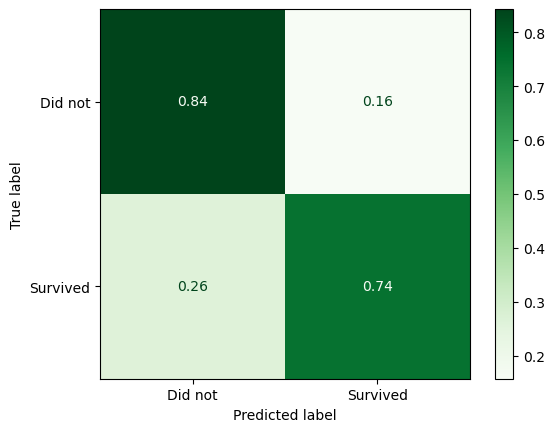

In [141]:
ConfusionMatrixDisplay.from_predictions(y_train, y_tree_train,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Survived'])

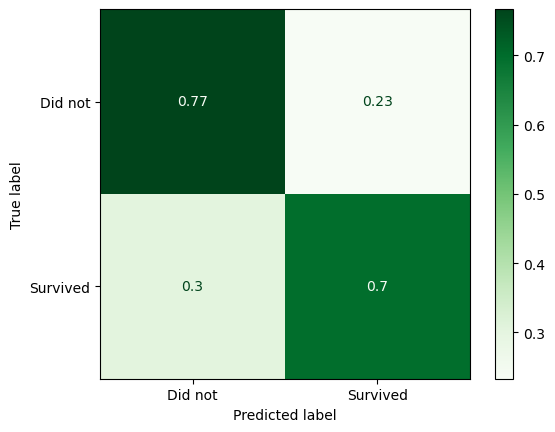

In [143]:
ConfusionMatrixDisplay.from_predictions(y_test, y_tree_test,
                                        normalize = 'true',
                                        cmap = 'Greens',
                                        display_labels = ['Did not', 'Survived'])
                                    
                            

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

features = ['Age', 'Sex']
label = ['Survived']

In [212]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


features = ['Sex', 'Age']
label = 'Survived'

data['Age'].fillna(data['Age'].mean(), inplace=True)

X = data[features]
y = data[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)


knn_predictions = knn.predict(X_test)



knn_confusion_matrix_train = confusion_matrix(y_train, knn.predict(X_train))
knn_confusion_matrix_test = confusion_matrix(y_test, knn_predictions)

print("KNN Confusion Matrix - Training Data:\n", knn_confusion_matrix_train)
print("KNN Confusion Matrix - Test Data:\n", knn_confusion_matrix_test)

KNN Confusion Matrix - Training Data:
 [[369  65]
 [ 76 199]]
KNN Confusion Matrix - Test Data:
 [[91 20]
 [27 40]]


C:\Users\17173\AppData\Local\Temp\ipykernel_12020\2475128270.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 

In [220]:
#the model performance decreases from the training data and the test data on both models


In [ ]:
#the KNN model had a better accuracy than the decision tree of the confusion matrix when finding the accuracy scores